In [1]:
import numpy as np
from astropy.table import Table

from floody import data as D
from floody import floody as F

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline 

In [3]:
#city_names = ['newyorkcity', 'miami', 'capecoral', 'chicago', 'losangeles', 'houston']
#xlims = [(-74.3, -73.675), (-80.8, -80.), (-82.3, -81.55), (-87.93, -87.45), (-118.53, -118.11), (-96.1, -94.75)]
#ylims = [(40.475, 40.95), (25.4, 26.2), (26.28, 26.9), (41.62, 42.03), (33.85, 34.2), (29.25, 30.25)]

city_names = ['newyorkcity', 'capecoral', 'chicago', 'losangeles', 'houston']
xlims = [(-74.3, -73.675), (-82.3, -81.55), (-87.93, -87.45), (-118.53, -118.11), (-96.1, -94.75)]
ylims = [(40.475, 40.95), (26.28, 26.9), (41.62, 42.03), (33.85, 34.2), (29.25, 30.25)]

average loss (average) for newyorkcity: -86.30
average loss (high) for newyorkcity: 2308.04
average loss (average) for capecoral: 447.62
average loss (high) for capecoral: -1743.33
average loss (average) for chicago: -44.06
average loss (high) for chicago: 1489.08
average loss (average) for losangeles: 716.30
average loss (high) for losangeles: 2633.91
average loss (average) for houston: 360.14
average loss (high) for houston: 14244.05


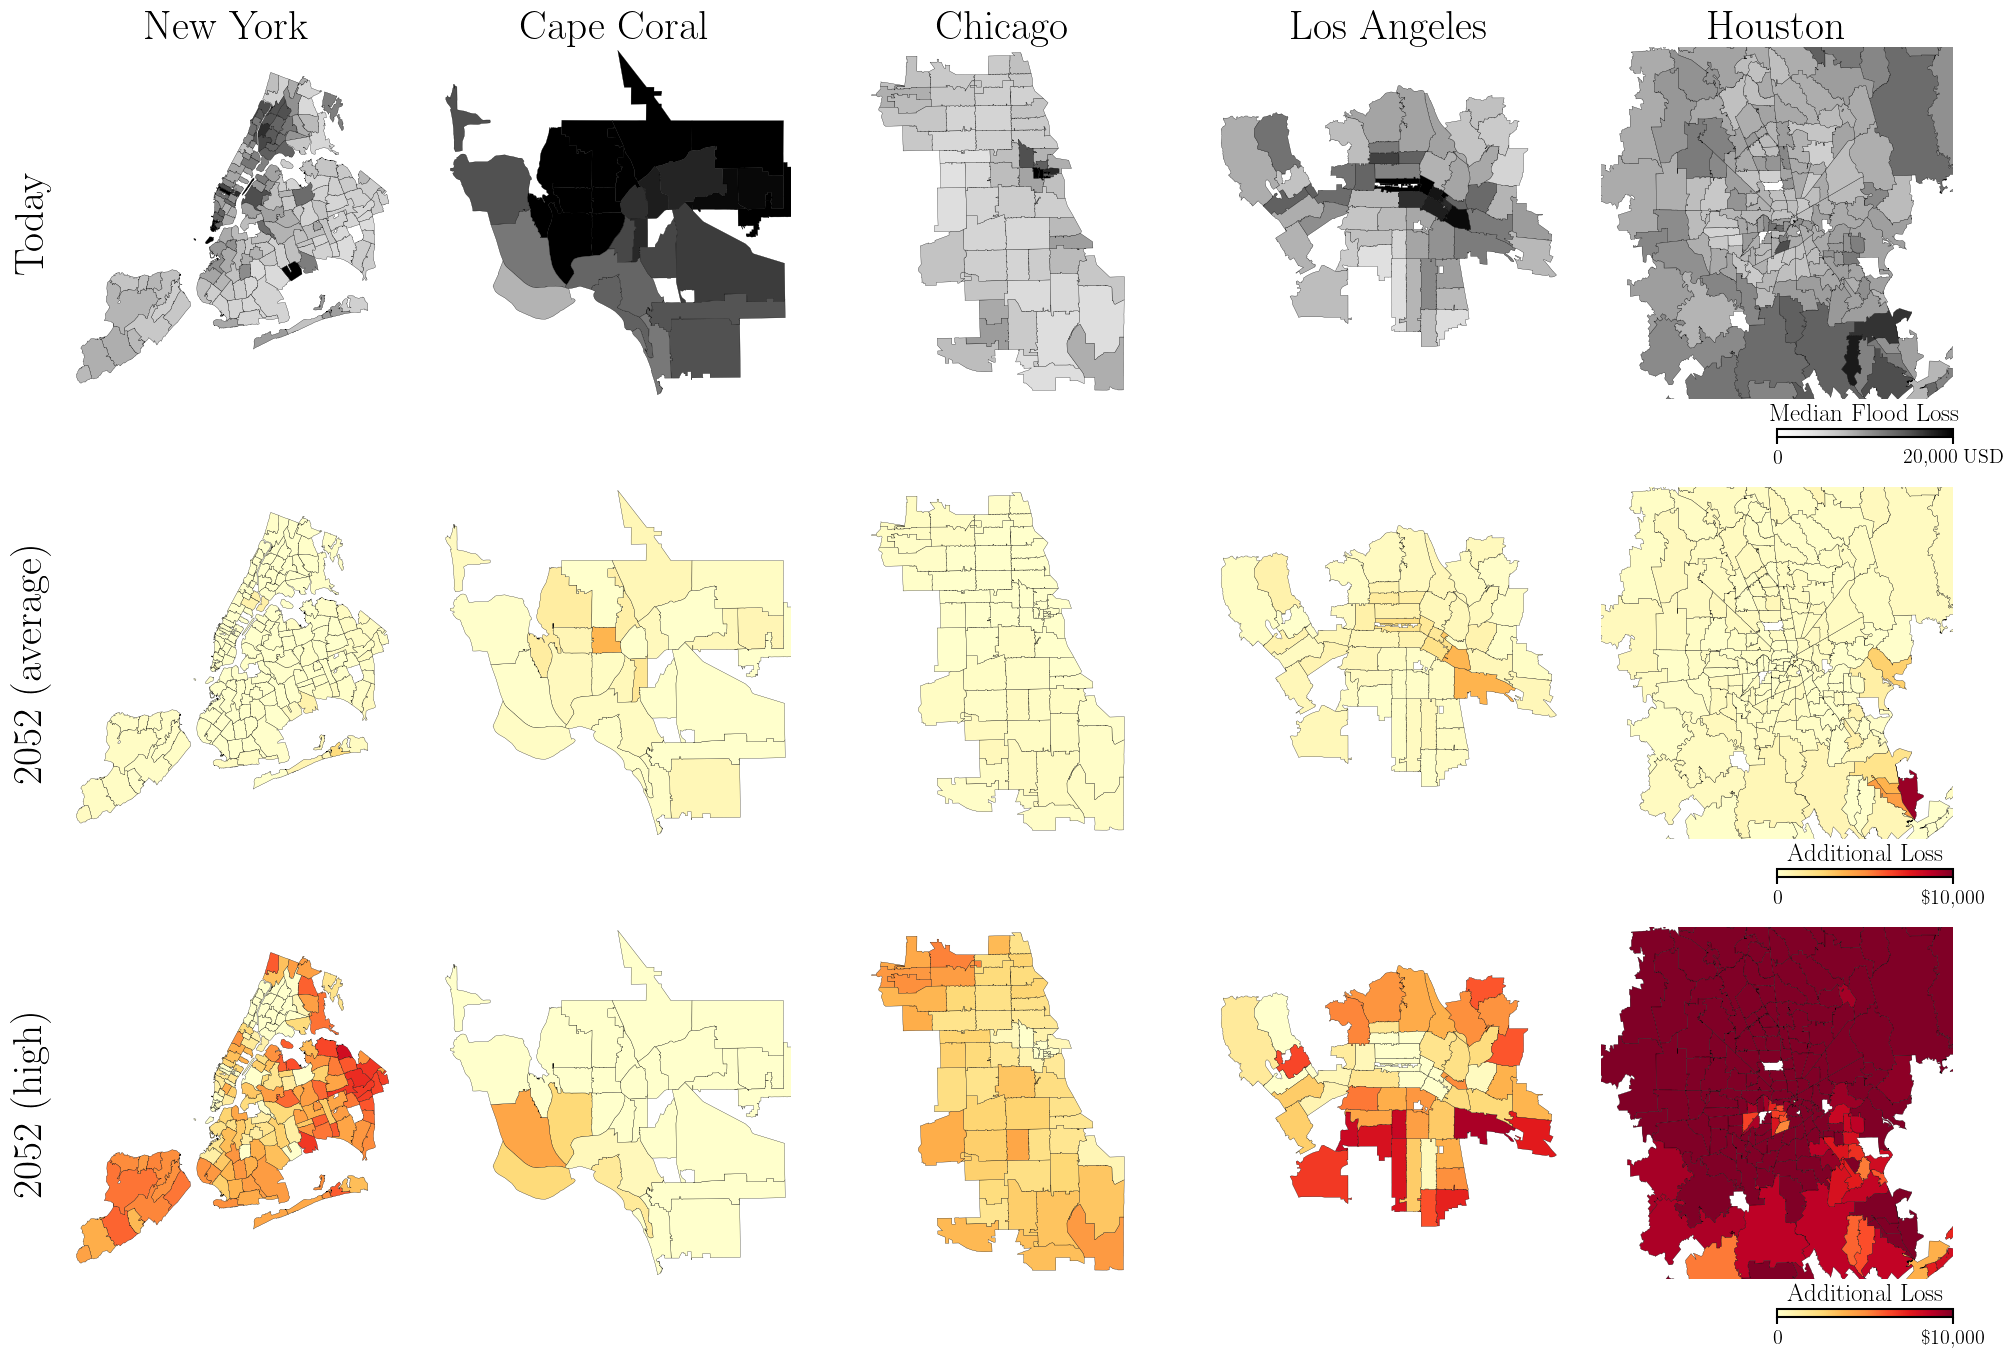

In [11]:
fig = plt.figure(figsize=(5*len(city_names), 16))

for i, name in enumerate(city_names): 
    city = D.read_zipshape(D.CityZipcodes(name))
    
    tbl = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.%s.v0.hdf5' % name)
    
    ax = fig.add_subplot(3, len(city_names), i+1)
    city['blank'] = tbl['flood_loss.2022']
    _ = city.plot(column='blank', cmap='Greys',  edgecolor='k', linewidth=0.2, 
                      vmin=0, vmax=2e4, ax=ax, aspect=(xlims[i][1] - xlims[i][0])/(ylims[i][1] - ylims[i][0]))
    ax.set_xlim(xlims[i])
    ax.set_ylim(ylims[i])
    ax.set_axis_off()
    ax.set_title(['New York', 'Cape Coral', 'Chicago', 'Los Angeles', 'Houston'][i], fontsize=30)
    
    if i == len(city_names) - 1: 
        sc = ax.scatter([], [], c=[], cmap='Greys', vmin=0., vmax=2e4)
        cbaxes = ax.inset_axes([0.5, -0.11, 0.5, 0.025],
                               transform=ax.transAxes) 
        cbar = plt.colorbar(sc, ticks=[0, 2e4], cax=cbaxes, orientation='horizontal')
        cbar.ax.set_xticklabels(['0', '20,000 USD'])
        cbar.ax.set_title('Median Flood Loss', fontsize=18)
        
    if i == 0: ax.text(0.0, 0.5, 'Today', rotation=90., 
                       transform=ax.transAxes, ha='right', va='center', fontsize=30)
    
    ax = fig.add_subplot(3, len(city_names), i+len(city_names)+1)
    
    city['blank'] = tbl['flood_loss.2052'] - tbl['flood_loss.2022']
    _ = city.plot(column='blank', cmap='YlOrRd',  edgecolor='k', linewidth=0.2, 
                      vmin=0, vmax=1e4, ax=ax, aspect=(xlims[i][1] - xlims[i][0])/(ylims[i][1] - ylims[i][0]))
    ax.set_xlim(xlims[i])
    ax.set_ylim(ylims[i])    
    ax.set_axis_off()
    print('average loss (average) for %s: %.2f' % (name, np.mean(city['blank'])))
    
    if i == len(city_names) - 1: 
        sc = ax.scatter([], [], c=[], cmap='YlOrRd', vmin=0., vmax=1e4)
        cbaxes = ax.inset_axes([0.5, -0.11, 0.5, 0.025],
                               transform=ax.transAxes) 
        cbar = plt.colorbar(sc, ticks=[0, 1e4], cax=cbaxes, orientation='horizontal')
        cbar.ax.set_xticklabels(['0', r'\$10,000'])
        cbar.ax.set_title('Additional Loss', fontsize=18)
    if i == 0: 
        ax.text(0.0, 0.5, '2052 (average)', rotation=90., 
                       transform=ax.transAxes, ha='right', va='center', fontsize=30)
    
    # worst case scenario claculation
    tbl = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.%s.v0_worst.hdf5' % name)

    ax = fig.add_subplot(3, len(city_names), i+2*len(city_names)+1)
    
    city['blank'] = tbl['flood_loss.2052'] - tbl['flood_loss.2022']
    _ = city.plot(column='blank', cmap='YlOrRd',  edgecolor='k', linewidth=0.2, 
                      vmin=0, vmax=1e4, ax=ax, aspect=(xlims[i][1] - xlims[i][0])/(ylims[i][1] - ylims[i][0]))
    ax.set_xlim(xlims[i])
    ax.set_ylim(ylims[i])    
    ax.set_axis_off()
    print('average loss (high) for %s: %.2f' % (name, np.mean(city['blank'])))
    if i == len(city_names) - 1: 
        sc = ax.scatter([], [], c=[], cmap='YlOrRd', vmin=0., vmax=1e4)
        cbaxes = ax.inset_axes([0.5, -0.11, 0.5, 0.025],
                               transform=ax.transAxes) 
        cbar = plt.colorbar(sc, ticks=[0, 1e4], cax=cbaxes, orientation='horizontal')
        cbar.ax.set_title('Additional Loss', fontsize=18)
        cbar.ax.set_xticklabels(['0', r'\$10,000'])
    if i == 0: 
        ax.text(0.0, 0.5, '2052 (high)', rotation=90., 
                       transform=ax.transAxes, ha='right', va='center', fontsize=30)
fig.subplots_adjust(hspace=0.25, wspace=0.) 
fig.savefig('flood_losses.pdf', bbox_inches='tight')